In [11]:
import os

DATASET_PATH = "/kaggle/input/mir1k/MIR-1K"

# List top-level files/folders
for item in os.listdir(DATASET_PATH):
    print(item)


vocal-nonvocalLabel
PitchLabel
LyricsWav
UnvoicedFrameLabel
readme.txt
Wavfile
UndividedWavfile
Lyrics


In [12]:
# Look inside Wavfile folder
wav_path = os.path.join(DATASET_PATH, "Wavfile")

for i, file in enumerate(os.listdir(wav_path)):
    print(file)
    if i >= 9:
        break


Kenshin_3_04.wav
geniusturtle_2_08.wav
geniusturtle_3_05.wav
titon_3_05.wav
stool_1_07.wav
titon_1_06.wav
bobon_4_10.wav
annar_3_02.wav
davidson_5_01.wav
jmzen_5_04.wav


In [13]:
# 1 file testing 

import librosa
import librosa.display
import matplotlib.pyplot as plt

# Pick one file
audio_path = "/kaggle/input/mir1k/MIR-1K/Wavfile/Kenshin_3_04.wav"

y, sr = librosa.load(audio_path, sr=None)

print("Sample rate:", sr)
print("Audio shape:", y.shape)
print("Duration (seconds):", len(y) / sr)


Sample rate: 16000
Audio shape: (104449,)
Duration (seconds): 6.5280625


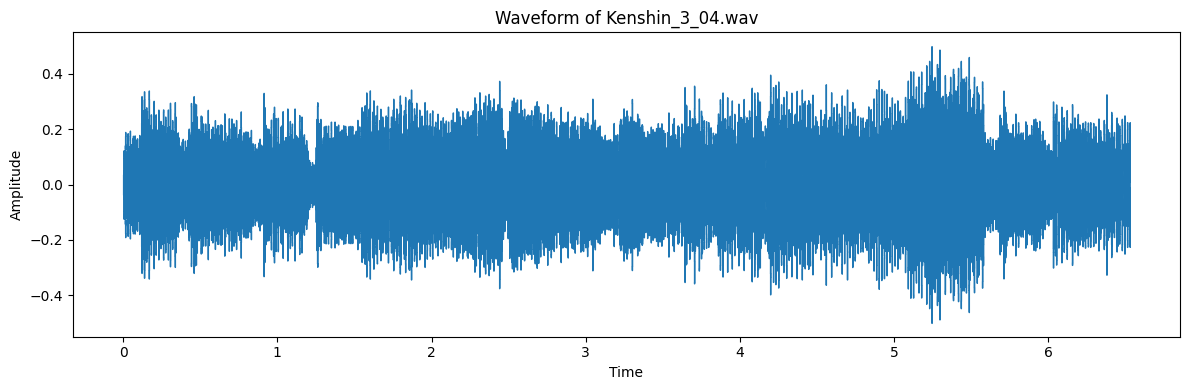

MFCC shape: (40, 205)


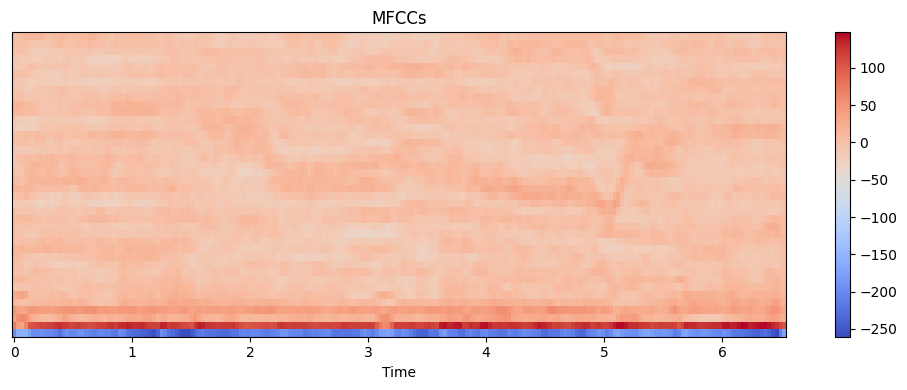

Final MFCC feature vector shape: (40,)


In [14]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Kenshin_3_04.wav")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()
import numpy as np

# Extract MFCCs
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

print("MFCC shape:", mfcc.shape)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.colorbar()
plt.title("MFCCs")
plt.tight_layout()
plt.show()
mfcc_mean = np.mean(mfcc, axis=1)

print("Final MFCC feature vector shape:", mfcc_mean.shape)


In [15]:
# moving to multiple songs

import os

WAV_DIR = "/kaggle/input/mir1k/MIR-1K/Wavfile"

wav_files = sorted([
    os.path.join(WAV_DIR, f)
    for f in os.listdir(WAV_DIR)
    if f.endswith(".wav")
])

print("Total audio files:", len(wav_files))
print("First 5 files:")
for f in wav_files[:5]:
    print(os.path.basename(f))


Total audio files: 1000
First 5 files:
Ani_1_01.wav
Ani_1_02.wav
Ani_1_03.wav
Ani_1_04.wav
Ani_1_05.wav


# vocal vs non vocal

Data set

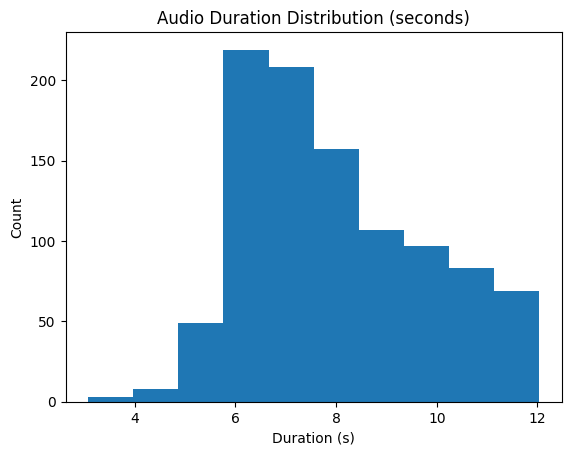

Min duration: 3.0784580498866214
Max duration: 12.03201814058957
Avg duration: 8.005619183673469


In [16]:
import librosa, os, numpy as np, matplotlib.pyplot as plt

durations = []
wav_dir = "/kaggle/input/mir1k/MIR-1K/Wavfile"

for file in os.listdir(wav_dir):
    if file.endswith(".wav"):
        y, sr = librosa.load(os.path.join(wav_dir, file))
        durations.append(len(y)/sr)

plt.figure()
plt.hist(durations)
plt.title("Audio Duration Distribution (seconds)")
plt.xlabel("Duration (s)")
plt.ylabel("Count")
plt.show()

print("Min duration:", np.min(durations))
print("Max duration:", np.max(durations))
print("Avg duration:", np.mean(durations))

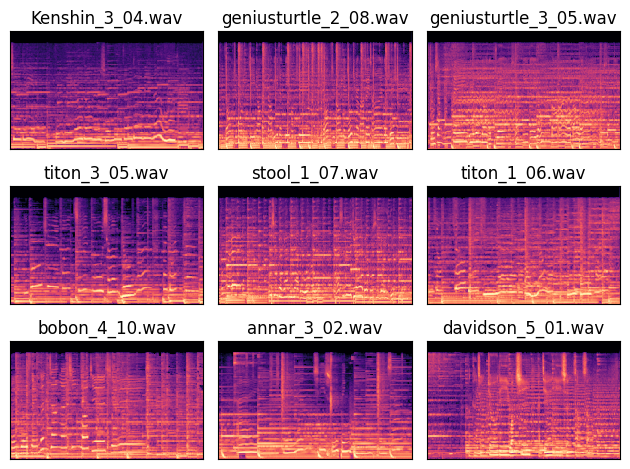

In [17]:
import librosa.display

plt.figure()
for i, file in enumerate(os.listdir(wav_dir)[:9]):
    y, sr = librosa.load(os.path.join(wav_dir, file))
    mel = librosa.feature.melspectrogram(y=y, sr=sr)
    plt.subplot(3,3,i+1)
    librosa.display.specshow(librosa.power_to_db(mel, ref=np.max))
    plt.title(file)
plt.tight_layout()
plt.show()

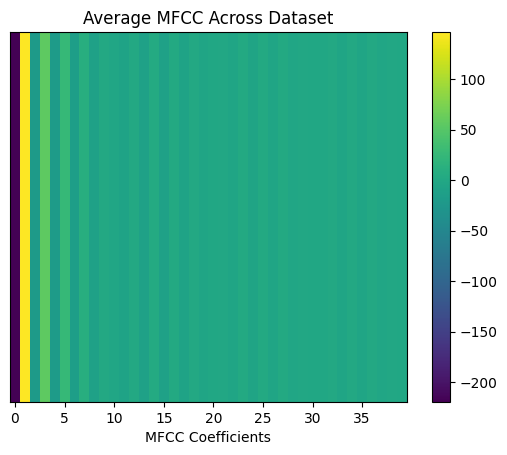

In [18]:
mfccs = []
for file in os.listdir(wav_dir):
    if file.endswith(".wav"):
        y, sr = librosa.load(os.path.join(wav_dir, file))
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
        mfccs.append(np.mean(mfcc, axis=1))

mfccs = np.array(mfccs)

plt.figure()
plt.imshow(np.mean(mfccs, axis=0).reshape(1,40), aspect='auto')
plt.title("Average MFCC Across Dataset")
plt.xlabel("MFCC Coefficients")
plt.yticks([])
plt.colorbar()
plt.show()

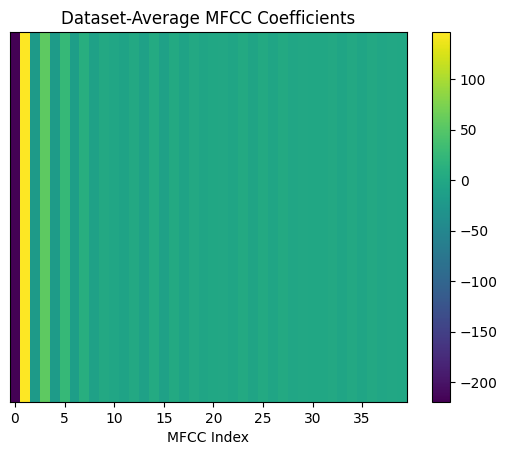

MFCC mean dataset shape: (1000, 40)


In [19]:
mfcc_means = []

for file in os.listdir(wav_dir):
    if file.endswith(".wav"):
        y, sr = librosa.load(os.path.join(wav_dir, file))
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
        mfcc_means.append(np.mean(mfcc, axis=1))

mfcc_means = np.array(mfcc_means)

plt.figure()
plt.imshow(np.mean(mfcc_means, axis=0).reshape(1,40), aspect='auto')
plt.title("Dataset-Average MFCC Coefficients")
plt.xlabel("MFCC Index")
plt.yticks([])
plt.colorbar()
plt.show()

print("MFCC mean dataset shape:", mfcc_means.shape)

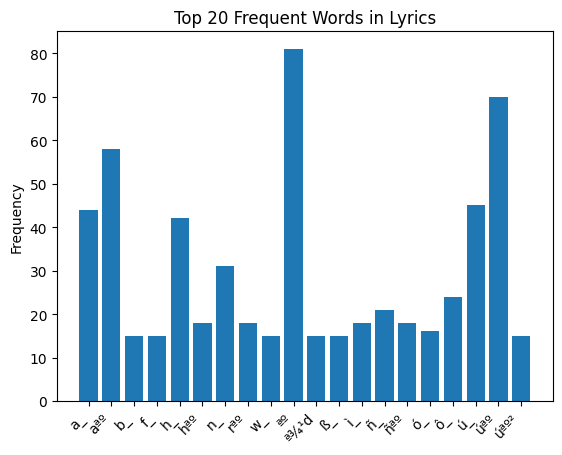

Vocabulary sample: ['a_' 'aªº' 'b_' 'f_' 'h_' 'hªº' 'n_' 'rªº' 'w_' 'ªº']


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
import os, numpy as np, matplotlib.pyplot as plt

lyrics_dir='/kaggle/input/mir1k/MIR-1K/Lyrics'
lyrics = []
for file in os.listdir(lyrics_dir):
    if file.endswith(".txt"):
        path = os.path.join(lyrics_dir, file)
        try:
            with open(path, "r", encoding="utf-8") as f:
                lyrics.append(f.read())
        except UnicodeDecodeError:
            with open(path, "r", encoding="latin-1") as f:
                lyrics.append(f.read())

vec = CountVectorizer(stop_words="english", max_features=20)
X = vec.fit_transform(lyrics)
words = vec.get_feature_names_out()
freq = np.array(X.sum(axis=0)).flatten()

plt.figure()
plt.bar(words, freq)
plt.title("Top 20 Frequent Words in Lyrics")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()

print("Vocabulary sample:", words[:10])

In [23]:
import numpy as np
import librosa

def extract_mfcc_mean(audio_path, n_mfcc=40):
    y, sr = librosa.load(audio_path, sr=16000)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_mean = np.mean(mfcc, axis=1)
    return mfcc_mean
    
features = []

for path in wav_files:
    mfcc_feat = extract_mfcc_mean(path)
    features.append(mfcc_feat)

X = np.array(features)

print("Feature matrix shape:", X.shape)


Feature matrix shape: (1000, 40)


In [24]:
#normalizing the values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled feature matrix shape:", X_scaled.shape)

#checking 
print("Mean of first feature:", X_scaled[:, 0].mean())
print("Std of first feature:", X_scaled[:, 0].std())


Scaled feature matrix shape: (1000, 40)
Mean of first feature: -9.536743e-09
Std of first feature: 1.0


In [25]:
#baseline (PCA + K-Means) using Silhouette Score and Calinski-Harabasz Index.


#pca dimension reduction because k mean high dimension e confuse hoye jay
from sklearn.decomposition import PCA

pca = PCA(n_components=16, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("PCA output shape:", X_pca.shape)


#applying basic kmean clustering 
from sklearn.cluster import KMeans

kmeans_pca = KMeans(n_clusters=2, random_state=42, n_init=10)
pca_labels = kmeans_pca.fit_predict(X_pca)

print("Cluster labels:", np.unique(pca_labels))


#score testing 
from sklearn.metrics import silhouette_score, calinski_harabasz_score

sil_pca = silhouette_score(X_pca, pca_labels)
ch_pca = calinski_harabasz_score(X_pca, pca_labels)

print("PCA + KMeans Silhouette Score:", sil_pca)
print("PCA + KMeans Calinski-Harabasz Index:", ch_pca)


PCA output shape: (1000, 16)
Cluster labels: [0 1]
PCA + KMeans Silhouette Score: 0.14382116
PCA + KMeans Calinski-Harabasz Index: 141.09985191260506


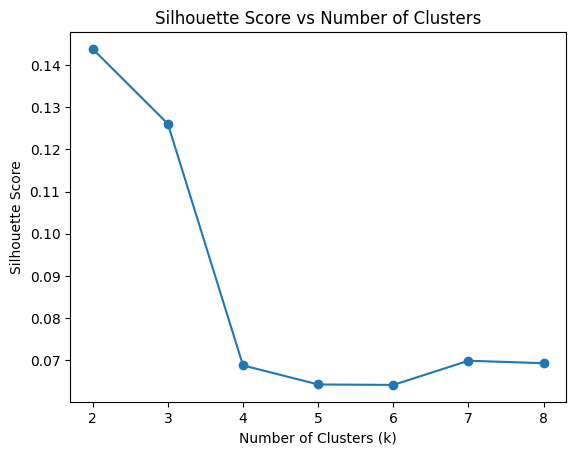

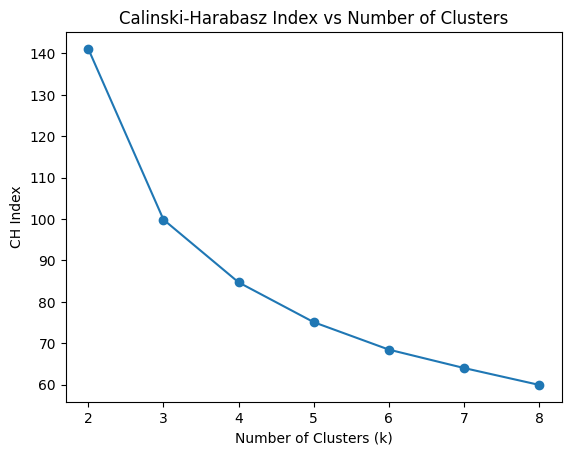

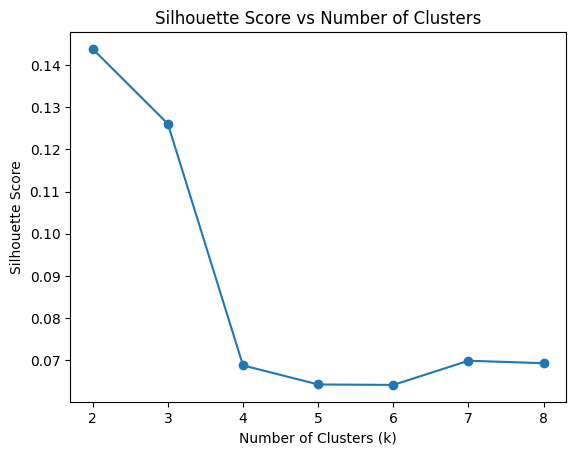

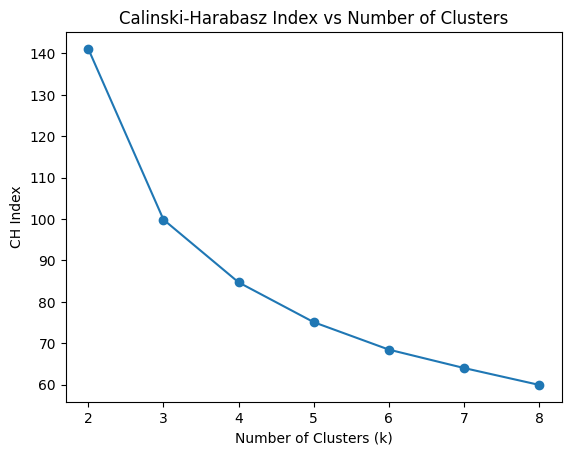

In [26]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

sil_scores = []
ch_scores = []
k_range = range(2, 9)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca)

    sil_scores.append(silhouette_score(X_pca, labels))
    ch_scores.append(calinski_harabasz_score(X_pca, labels))

# Plot Silhouette
plt.figure()
plt.plot(k_range, sil_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

# Plot Calinski-Harabasz
plt.figure()
plt.plot(k_range, ch_scores, marker='o')
plt.title("Calinski-Harabasz Index vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("CH Index")
plt.show()

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

sil_scores = []
ch_scores = []
k_range = range(2, 9)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca)

    sil_scores.append(silhouette_score(X_pca, labels))
    ch_scores.append(calinski_harabasz_score(X_pca, labels))

# Plot Silhouette
plt.figure()
plt.plot(k_range, sil_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

# Plot Calinski-Harabasz
plt.figure()
plt.plot(k_range, ch_scores, marker='o')
plt.title("Calinski-Harabasz Index vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("CH Index")
plt.show()




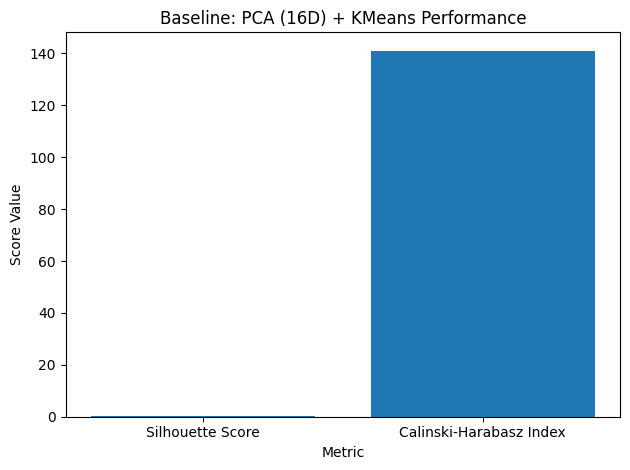

In [27]:
import matplotlib.pyplot as plt

# Scores you already computed
scores = {
    "Silhouette Score": sil_pca,
    "Calinski-Harabasz Index": ch_pca
}

# Plot
plt.figure()
plt.bar(scores.keys(), scores.values())
plt.title("Baseline: PCA (16D) + KMeans Performance")
plt.ylabel("Score Value")
plt.xlabel("Metric")
plt.tight_layout()
plt.show()


In [28]:
#Starting VAE with pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# Convert feature matrix to torch tensor
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

# Dataset and dataloader
dataset = TensorDataset(X_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


In [33]:
#VAE  mddel define kortesi
class VAE(nn.Module):
    def __init__(self, input_dim=40, latent_dim=8):
        super(VAE, self).__init__()
        # Encoder
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc_mu = nn.Linear(16, latent_dim)
        self.fc_logvar = nn.Linear(16, latent_dim)
        
        # Decoder
        self.fc3 = nn.Linear(latent_dim, 16)
        self.fc4 = nn.Linear(16, 32)
        self.fc5 = nn.Linear(32, input_dim)
        
    def encode(self, x):
        h = F.relu(self.fc1(x))
        h = F.relu(self.fc2(h))
        return self.fc_mu(h), self.fc_logvar(h)
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def decode(self, z):
        h = F.relu(self.fc3(z))
        h = F.relu(self.fc4(h))
        return self.fc5(h)
    
    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decode(z)
        return x_recon, mu, logvar
def vae_loss(x_recon, x, mu, logvar):
    recon_loss = F.mse_loss(x_recon, x, reduction='sum')
    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + kl_loss


In [34]:

#initializing vae
# Device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Model
latent_dim = 8
model = VAE(input_dim=40, latent_dim=latent_dim).to(device)

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


Using device: cuda


In [36]:
import matplotlib.pyplot as plt

num_epochs = 10
epoch_losses = []

for epoch in range(1, num_epochs + 1):
    model.train()
    train_loss = 0
    
    for batch in dataloader:
        x_batch = batch[0].to(device)
        optimizer.zero_grad()
        x_recon, mu, logvar = model(x_batch)
        loss = vae_loss(x_recon, x_batch, mu, logvar)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    avg_loss = train_loss / len(dataset)
    epoch_losses.append(avg_loss)
    
    print(f"Epoch [{epoch}/{num_epochs}], Loss: {avg_loss:.4f}")


Epoch [1/10], Loss: 36.6828
Epoch [2/10], Loss: 36.2477
Epoch [3/10], Loss: 35.7997
Epoch [4/10], Loss: 35.5500
Epoch [5/10], Loss: 34.8041
Epoch [6/10], Loss: 34.7162
Epoch [7/10], Loss: 34.3592
Epoch [8/10], Loss: 34.2319
Epoch [9/10], Loss: 34.1277
Epoch [10/10], Loss: 34.0254


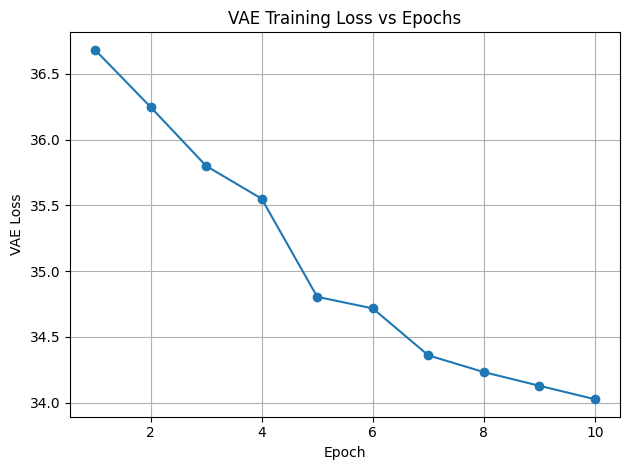

In [37]:
plt.figure()
plt.plot(range(1, num_epochs + 1), epoch_losses, marker='o')
plt.xlabel("Epoch")
plt.ylabel("VAE Loss")
plt.title("VAE Training Loss vs Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()


In [38]:
#auto encoder theke feature extract kortesi.
model.eval()  # set model to evaluation mode

latent_vectors = []

with torch.no_grad():
    for batch in dataloader:
        x_batch = batch[0].to(device)
        mu, logvar = model.encode(x_batch)
        latent_vectors.append(mu.cpu().numpy())

# Combine all batches
Z = np.vstack(latent_vectors)
print("Latent feature matrix shape:", Z.shape)


Latent feature matrix shape: (1000, 8)


In [39]:
from sklearn.cluster import KMeans

kmeans_vae = KMeans(n_clusters=2, random_state=42, n_init=10)
vae_labels = kmeans_vae.fit_predict(Z)

print("Cluster labels:", np.unique(vae_labels))


Cluster labels: [0 1]


In [40]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

sil_vae = silhouette_score(Z, vae_labels)
ch_vae = calinski_harabasz_score(Z, vae_labels)

print("VAE + KMeans Silhouette Score:", sil_vae)
print("VAE + KMeans Calinski-Harabasz Index:", ch_vae)


VAE + KMeans Silhouette Score: 0.26870584
VAE + KMeans Calinski-Harabasz Index: 354.4105091377143


t-SNE output shape: (1000, 2)


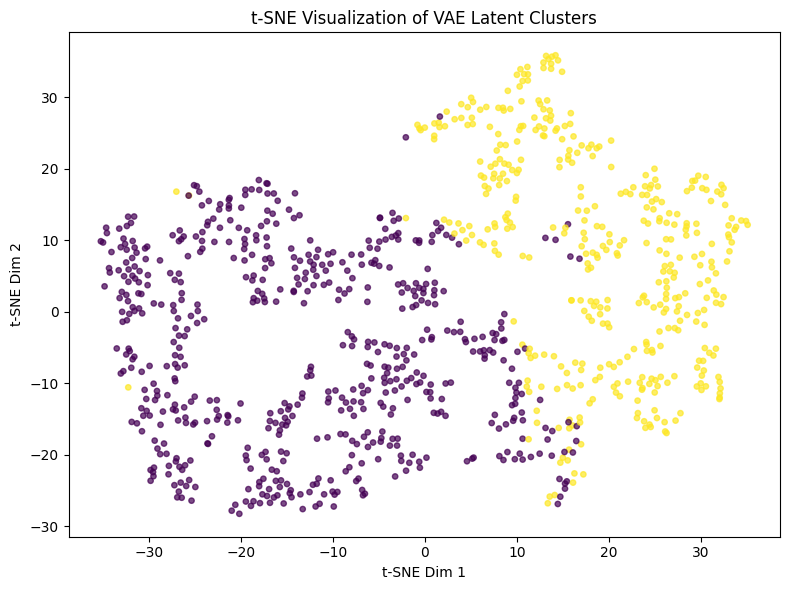

In [41]:
#visualize using tsne
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,
    perplexity=30,
    random_state=42,
    init="pca"
)

Z_2d = tsne.fit_transform(Z)

print("t-SNE output shape:", Z_2d.shape)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(
    Z_2d[:, 0],
    Z_2d[:, 1],
    c=vae_labels,
    s=15,
    alpha=0.7
)
plt.title("t-SNE Visualization of VAE Latent Clusters")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.tight_layout()
plt.show()


Mel-spectrogram shape: (128, 205)


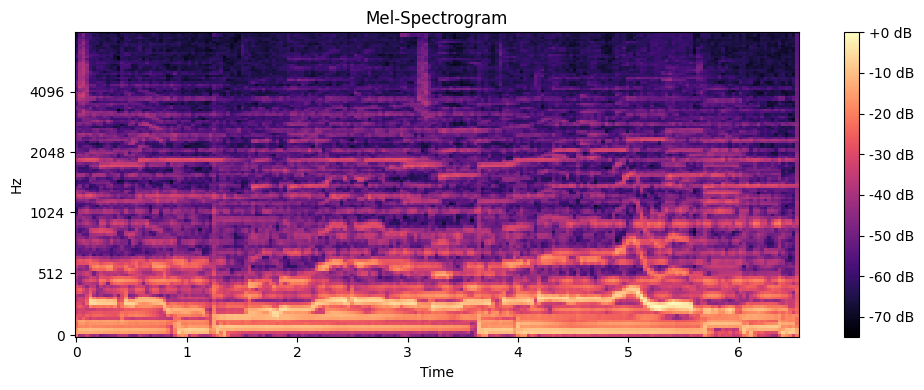

In [42]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

#checking one single file
audio_path = "/kaggle/input/mir1k/MIR-1K/Wavfile/Kenshin_3_04.wav"

y, sr = librosa.load(audio_path, sr=16000)

mel_spec = librosa.feature.melspectrogram(
    y=y,
    sr=sr,
    n_mels=128,
    n_fft=1024,
    hop_length=512
)

mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

print("Mel-spectrogram shape:", mel_spec_db.shape)

plt.figure(figsize=(10, 4))
librosa.display.specshow(
    mel_spec_db,
    sr=sr,
    hop_length=512,
    x_axis="time",
    y_axis="mel"
)
plt.colorbar(format="%+2.0f dB")
plt.title("Mel-Spectrogram")
plt.tight_layout()
plt.show()


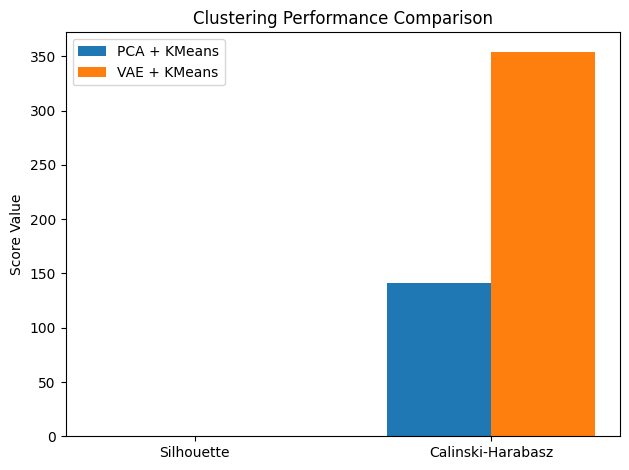

In [43]:
import numpy as np

labels = ["Silhouette", "Calinski-Harabasz"]

pca_scores = [sil_pca, ch_pca]
vae_scores = [sil_vae, ch_vae]

x = np.arange(len(labels))
width = 0.35

plt.figure()
plt.bar(x - width/2, pca_scores, width, label="PCA + KMeans")
plt.bar(x + width/2, vae_scores, width, label="VAE + KMeans")

plt.xticks(x, labels)
plt.ylabel("Score Value")
plt.title("Clustering Performance Comparison")
plt.legend()
plt.tight_layout()
plt.show()


In [45]:

#bringig the dimension to power of 2 for better performance

def fix_spectrogram_size(spec, max_len=256):
    """
    spec: (freq_bins, time_frames)
    """
    if spec.shape[1] < max_len:
        pad_width = max_len - spec.shape[1]
        spec = np.pad(spec, ((0, 0), (0, pad_width)), mode='constant')
    else:
        spec = spec[:, :max_len]
    return spec
fixed_mel = fix_spectrogram_size(mel_spec_db, max_len=256)
print("Fixed mel shape:", fixed_mel.shape)


Fixed mel shape: (128, 256)


In [46]:
#now doing for all file in dataset (mel spectogram mane audio to image jate cnn train korte pari)
def extract_fixed_mel(audio_path, sr=16000, n_mels=128, max_len=256):
    y, _ = librosa.load(audio_path, sr=sr)
    mel = librosa.feature.melspectrogram(
        y=y,
        sr=sr,
        n_mels=n_mels,
        n_fft=1024,
        hop_length=512
    )
    mel_db = librosa.power_to_db(mel, ref=np.max)
    mel_fixed = fix_spectrogram_size(mel_db, max_len=max_len)
    return mel_fixed

mel_specs = []

for path in wav_files:
    mel = extract_fixed_mel(path)
    mel_specs.append(mel)

mel_specs = np.array(mel_specs)
mel_specs = mel_specs[:, np.newaxis, :, :]  # add channel dim

print("Mel-spectrogram dataset shape:", mel_specs.shape)


Mel-spectrogram dataset shape: (1000, 1, 128, 256)


In [47]:
#building Conv VAE


class ConvVAE(nn.Module):
    def __init__(self, latent_dim=16):
        super().__init__()

        # Encoder
        self.enc_conv1 = nn.Conv2d(1, 32, 4, stride=2, padding=1)   # (32, 64, 128)
        self.enc_conv2 = nn.Conv2d(32, 64, 4, stride=2, padding=1)  # (64, 32, 64)
        self.enc_conv3 = nn.Conv2d(64, 128, 4, stride=2, padding=1) # (128, 16, 32)

        self.flatten = nn.Flatten()
        self.fc_mu = nn.Linear(128 * 16 * 32, latent_dim)
        self.fc_logvar = nn.Linear(128 * 16 * 32, latent_dim)

        # Decoder
        self.fc_dec = nn.Linear(latent_dim, 128 * 16 * 32)

        self.dec_conv1 = nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1)
        self.dec_conv2 = nn.ConvTranspose2d(64, 32, 4, stride=2, padding=1)
        self.dec_conv3 = nn.ConvTranspose2d(32, 1, 4, stride=2, padding=1)

    def encode(self, x):
        x = F.relu(self.enc_conv1(x))
        x = F.relu(self.enc_conv2(x))
        x = F.relu(self.enc_conv3(x))
        x = self.flatten(x)
        logvar = self.fc_logvar(x)
        logvar = torch.clamp(logvar, min=-10, max=10)
        return self.fc_mu(x), logvar


    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        x = self.fc_dec(z)
        x = x.view(-1, 128, 16, 32)
        x = F.relu(self.dec_conv1(x))
        x = F.relu(self.dec_conv2(x))
        return self.dec_conv3(x)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decode(z)
        return x_recon, mu, logvar
def conv_vae_loss(x_recon, x, mu, logvar, beta=0.001):
    recon = F.mse_loss(x_recon, x, reduction='sum')
    kl = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon + beta * kl



In [48]:
#Normalize and dataset load using pytorch
mel_min = mel_specs.min()
mel_max = mel_specs.max()

mel_specs_norm = (mel_specs - mel_min) / (mel_max - mel_min + 1e-8)

print("Normalized mel range:",
      mel_specs_norm.min(),
      mel_specs_norm.max())

mel_tensor = torch.tensor(mel_specs_norm, dtype=torch.float32)

mel_dataset = TensorDataset(mel_tensor)
mel_loader = DataLoader(mel_dataset, batch_size=16, shuffle=True)


Normalized mel range: 0.0 1.0


In [49]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

latent_dim = 16
conv_vae = ConvVAE(latent_dim=latent_dim).to(device)

optimizer = torch.optim.Adam(conv_vae.parameters(), lr=1e-3)
num_epochs = 5

for epoch in range(1, num_epochs + 1):
    conv_vae.train()
    total_loss = 0
    
    for batch in mel_loader:
        x = batch[0].to(device)
        optimizer.zero_grad()
        
        x_recon, mu, logvar = conv_vae(x)
        loss = conv_vae_loss(x_recon, x, mu, logvar)
        
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    avg_loss = total_loss / len(mel_dataset)
    print(f"Epoch [{epoch}/{num_epochs}] - Loss: {avg_loss:.4f}")


Using device: cuda
Epoch [1/5] - Loss: 2126.5946
Epoch [2/5] - Loss: 686.8162
Epoch [3/5] - Loss: 532.2419
Epoch [4/5] - Loss: 462.8187
Epoch [5/5] - Loss: 439.3220


In [50]:
#extracting latent feature from the mel spectogram
conv_vae.eval()

cnn_latents = []

with torch.no_grad():
    for batch in mel_loader:
        x = batch[0].to(device)
        mu, logvar = conv_vae.encode(x)
        cnn_latents.append(mu.cpu().numpy())

Z_cnn = np.vstack(cnn_latents)
print("CNN-VAE latent shape:", Z_cnn.shape)


CNN-VAE latent shape: (1000, 16)


In [51]:
#combinig lyrics with audio. first loading lyrics
import os
LYRICS_DIR = "/kaggle/input/mir1k/MIR-1K/Lyrics"

def load_lyrics(lyrics_dir):
    lyrics_dict = {}
    for fname in os.listdir(lyrics_dir):
        if fname.endswith(".txt"):
            key = fname.replace(".txt", "")
            with open(os.path.join(lyrics_dir, fname), "r", encoding="utf-8", errors="ignore") as f:
                lyrics_dict[key] = f.read()
    return lyrics_dict

lyrics_dict = load_lyrics(LYRICS_DIR)

print("Total lyrics files:", len(lyrics_dict))




Total lyrics files: 1000


In [52]:
#cross checking lyric with audio order
lyrics_list = []

missing = 0
for path in wav_files:
    key = os.path.basename(path).replace(".wav", "")
    if key in lyrics_dict:
        lyrics_list.append(lyrics_dict[key])
    else:
        lyrics_list.append("")
        missing += 1

print("Lyrics aligned:", len(lyrics_list))
print("Missing lyrics:", missing)


Lyrics aligned: 1000
Missing lyrics: 0


In [53]:
import re

def clean_lyrics(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", " ", text)   # keep letters only
    text = re.sub(r"\s+", " ", text)
    return text.strip()

lyrics_clean = [clean_lyrics(t) for t in lyrics_list]

print("Original:\n", lyrics_list[0][:200])
print("\nCleaned:\n", lyrics_clean[0][:200])


Original:
 OF_GOI檺_RRݵ

Cleaned:
 of goi rr


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=3000,
    ngram_range=(1, 2),
    stop_words=None
)

X_lyrics = tfidf.fit_transform(lyrics_clean)

print("TF-IDF lyrics shape:", X_lyrics.shape)

from sklearn.decomposition import PCA

pca_lyrics = PCA(n_components=50, random_state=42)
Z_lyrics = pca_lyrics.fit_transform(X_lyrics.toarray())

print("Lyrics embedding shape:", Z_lyrics.shape)


TF-IDF lyrics shape: (1000, 1073)
Lyrics embedding shape: (1000, 50)


Concatenate with audio

In [56]:
Z_multimodal = np.concatenate([Z_cnn, Z_lyrics], axis=1)

print("Multimodal feature shape:", Z_multimodal.shape)


Multimodal feature shape: (1000, 66)


In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

kmeans_mm = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_mm_km = kmeans_mm.fit_predict(Z_multimodal)

sil_mm_km = silhouette_score(Z_multimodal, labels_mm_km)
db_mm_km = davies_bouldin_score(Z_multimodal, labels_mm_km)

print("Multimodal + KMeans")
print("Silhouette:", sil_mm_km)
print("Davies-Bouldin:", db_mm_km)


Multimodal + KMeans
Silhouette: 0.36250909933090936
Davies-Bouldin: 1.2717672952413333


In [60]:
from sklearn.cluster import AgglomerativeClustering

agg_mm = AgglomerativeClustering(n_clusters=2, linkage="ward")
labels_mm_agg = agg_mm.fit_predict(Z_multimodal)

sil_mm_agg = silhouette_score(Z_multimodal, labels_mm_agg)
db_mm_agg = davies_bouldin_score(Z_multimodal, labels_mm_agg)

print("\nMultimodal + Agglomerative")
print("Silhouette:", sil_mm_agg)
print("Davies-Bouldin:", db_mm_agg)



Multimodal + Agglomerative
Silhouette: 0.34356835570704025
Davies-Bouldin: 1.233951935767896


In [61]:
from sklearn.cluster import DBSCAN

dbscan_mm = DBSCAN(eps=1.2, min_samples=10)
labels_mm_db = dbscan_mm.fit_predict(Z_multimodal)

mask = labels_mm_db != -1

if len(set(labels_mm_db[mask])) > 1:
    sil_mm_db = silhouette_score(Z_multimodal[mask], labels_mm_db[mask])
    db_mm_db = davies_bouldin_score(Z_multimodal[mask], labels_mm_db[mask])
    print("\nMultimodal + DBSCAN")
    print("Silhouette:", sil_mm_db)
    print("Davies-Bouldin:", db_mm_db)
else:
    print("\nDBSCAN found <2 clusters (tune eps)")



DBSCAN found <2 clusters (tune eps)


hard task 

updating conv vae with B-Vae (just changing loss function)

In [62]:
#building Conv VAE


class ConvVAE(nn.Module):
    def __init__(self, latent_dim=16):
        super().__init__()

        # Encoder
        self.enc_conv1 = nn.Conv2d(1, 32, 4, stride=2, padding=1)   # (32, 64, 128)
        self.enc_conv2 = nn.Conv2d(32, 64, 4, stride=2, padding=1)  # (64, 32, 64)
        self.enc_conv3 = nn.Conv2d(64, 128, 4, stride=2, padding=1) # (128, 16, 32)

        self.flatten = nn.Flatten()
        self.fc_mu = nn.Linear(128 * 16 * 32, latent_dim)
        self.fc_logvar = nn.Linear(128 * 16 * 32, latent_dim)

        # Decoder
        self.fc_dec = nn.Linear(latent_dim, 128 * 16 * 32)

        self.dec_conv1 = nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1)
        self.dec_conv2 = nn.ConvTranspose2d(64, 32, 4, stride=2, padding=1)
        self.dec_conv3 = nn.ConvTranspose2d(32, 1, 4, stride=2, padding=1)

    def encode(self, x):
        x = F.relu(self.enc_conv1(x))
        x = F.relu(self.enc_conv2(x))
        x = F.relu(self.enc_conv3(x))
        x = self.flatten(x)
        logvar = self.fc_logvar(x)
        logvar = torch.clamp(logvar, min=-10, max=10)
        return self.fc_mu(x), logvar


    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        x = self.fc_dec(z)
        x = x.view(-1, 128, 16, 32)
        x = F.relu(self.dec_conv1(x))
        x = F.relu(self.dec_conv2(x))
        return self.dec_conv3(x)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decode(z)
        return x_recon, mu, logvar
def beta_vae_loss(x_recon, x, mu, logvar, beta=4.0):
    recon = F.mse_loss(x_recon, x, reduction='sum')
    kl = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon + beta * kl




In [63]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

latent_dim = 16
conv_beta_vae = ConvVAE(latent_dim=latent_dim).to(device)

optimizer = torch.optim.Adam(conv_beta_vae.parameters(), lr=1e-3)
num_epochs = 5

for epoch in range(num_epochs):
    total_loss = 0
    for batch in mel_loader:
        x = batch[0].to(device)

        x_recon, mu, logvar = conv_beta_vae(x)
        loss = beta_vae_loss(x_recon, x, mu, logvar, beta=4.0)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {total_loss / len(mel_loader):.2f}")


Using device: cuda
Epoch [1/5] - Loss: 567654.96
Epoch [2/5] - Loss: 181313.66
Epoch [3/5] - Loss: 110140.39
Epoch [4/5] - Loss: 29187.00
Epoch [5/5] - Loss: 17610.82


In [64]:
conv_beta_vae.eval()

Z_beta = []

with torch.no_grad():
    for batch in mel_loader:
        x = batch[0].to(device)
        mu, logvar = conv_beta_vae.encode(x)
        Z_beta.append(mu.cpu().numpy())

Z_beta = np.vstack(Z_beta)
print("β-VAE latent shape:", Z_beta.shape)


β-VAE latent shape: (1000, 16)


In [65]:
LABEL_DIR = "/kaggle/input/mir1k/MIR-1K/vocal-nonvocalLabel"

def load_vocal_labels(wav_files, label_dir):
    song_labels = []

    for wav_path in wav_files:
        key = os.path.basename(wav_path).replace(".wav", "")
        label_path = os.path.join(label_dir, key + ".vocal")

        with open(label_path, "r") as f:
            labels = [int(line.strip()) for line in f if line.strip() != ""]

        song_label = 1 if np.mean(labels) > 0.5 else 0
        song_labels.append(song_label)

    return np.array(song_labels)

y_true = load_vocal_labels(wav_files, LABEL_DIR)

print("Label shape:", y_true.shape)
print("Vocal songs:", np.sum(y_true))
print("Non-vocal songs:", len(y_true) - np.sum(y_true))




Label shape: (1000,)
Vocal songs: 982
Non-vocal songs: 18


In [66]:
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
import numpy as np

def cluster_purity(y_true, y_pred):
    clusters = np.unique(y_pred)
    total = 0
    for c in clusters:
        idx = np.where(y_pred == c)[0]
        if len(idx) == 0:
            continue
        majority = np.bincount(y_true[idx]).max()
        total += majority
    return total / len(y_true)


In [67]:
from sklearn.cluster import KMeans

kmeans_beta = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_beta = kmeans_beta.fit_predict(Z_beta)

nmi_beta = normalized_mutual_info_score(y_true, labels_beta)
ari_beta = adjusted_rand_score(y_true, labels_beta)
purity_beta = cluster_purity(y_true, labels_beta)

print("β-VAE + KMeans")
print("NMI:", nmi_beta)
print("ARI:", ari_beta)
print("Purity:", purity_beta)


β-VAE + KMeans
NMI: 0.0012678809553097541
ARI: 0.001950620990443354
Purity: 0.982


In [68]:
kmeans_cnn = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_cnn = kmeans_cnn.fit_predict(Z_cnn)

print("\nCNN-VAE + KMeans")
print("NMI:", normalized_mutual_info_score(y_true, labels_cnn))
print("ARI:", adjusted_rand_score(y_true, labels_cnn))
print("Purity:", cluster_purity(y_true, labels_cnn))



CNN-VAE + KMeans
NMI: 6.654042600513382e-05
ARI: -0.0002815885833996913
Purity: 0.982


In [69]:
kmeans_mm = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_mm = kmeans_mm.fit_predict(Z_multimodal)

print("\nMultimodal + KMeans")
print("NMI:", normalized_mutual_info_score(y_true, labels_mm))
print("ARI:", adjusted_rand_score(y_true, labels_mm))
print("Purity:", cluster_purity(y_true, labels_mm))



Multimodal + KMeans
NMI: 6.654042600513382e-05
ARI: -0.0002815885833996913
Purity: 0.982


visualization

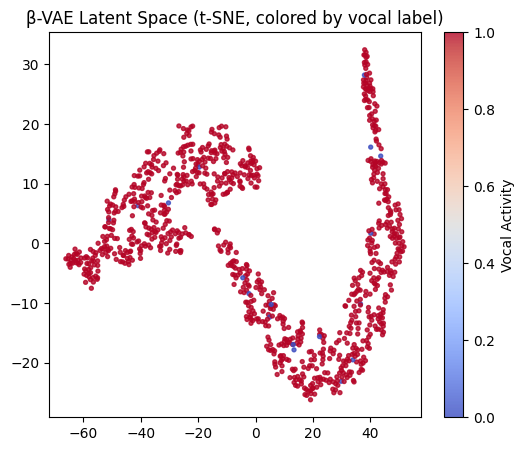

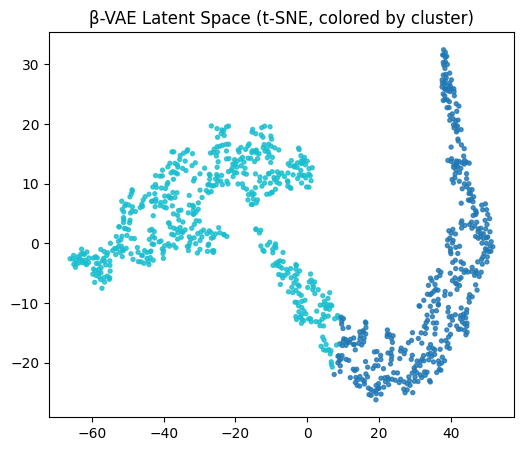

In [70]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    n_iter=1000,
    random_state=42
)

Z_tsne = tsne.fit_transform(Z_beta)

plt.figure(figsize=(6,5))
plt.scatter(
    Z_tsne[:, 0],
    Z_tsne[:, 1],
    c=y_true,
    cmap="coolwarm",
    s=8,
    alpha=0.8
)
plt.title("β-VAE Latent Space (t-SNE, colored by vocal label)")
plt.colorbar(label="Vocal Activity")
plt.show()

plt.figure(figsize=(6,5))
plt.scatter(
    Z_tsne[:, 0],
    Z_tsne[:, 1],
    c=labels_beta,
    cmap="tab10",
    s=8,
    alpha=0.8
)
plt.title("β-VAE Latent Space (t-SNE, colored by cluster)")
plt.show()


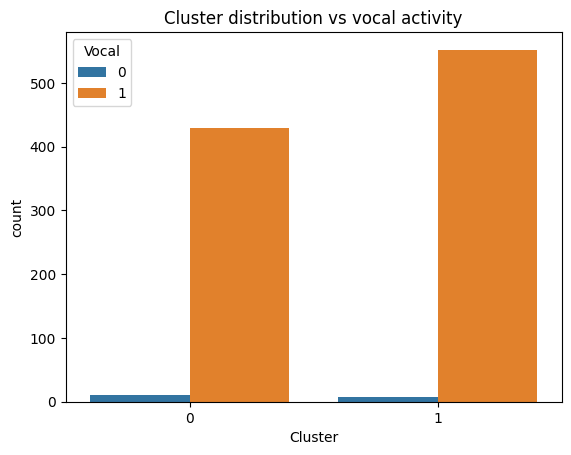

In [71]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame({
    "Cluster": labels_beta,
    "Vocal": y_true
})

sns.countplot(data=df, x="Cluster", hue="Vocal")
plt.title("Cluster distribution vs vocal activity")
plt.show()


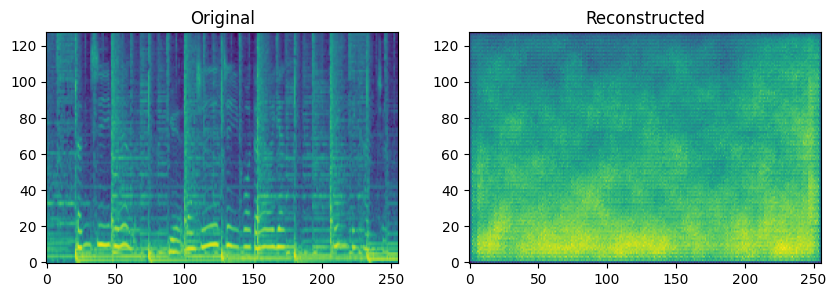

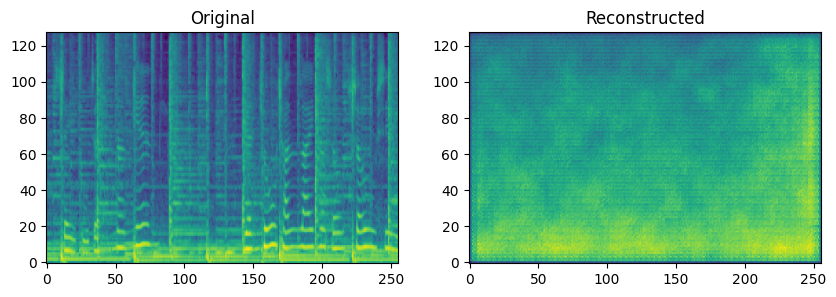

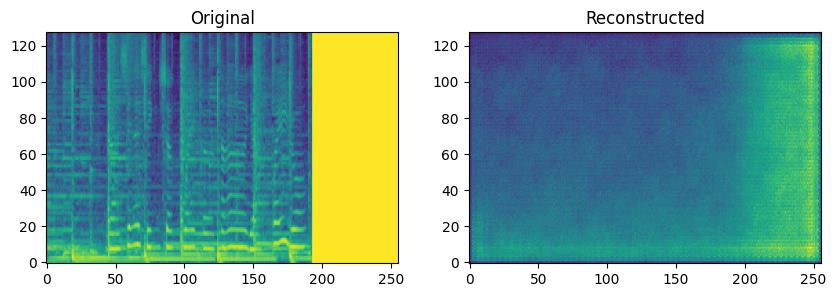

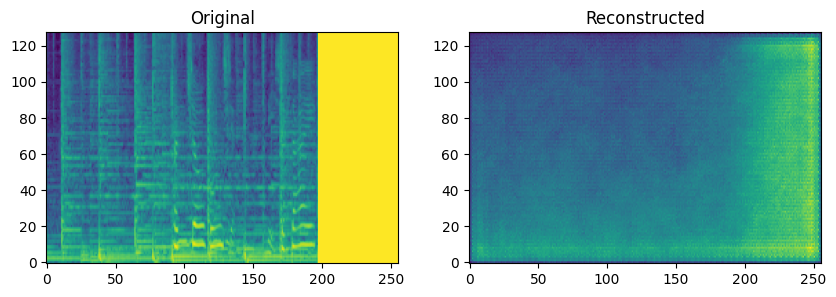

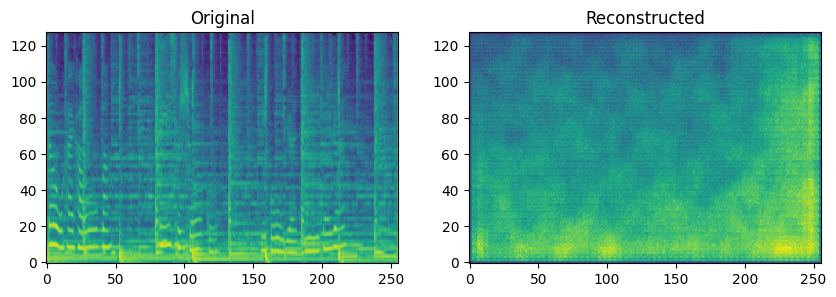

In [72]:
conv_beta_vae.eval()
with torch.no_grad():
    x = mel_tensor[:5].to(device)
    x_recon, _, _ = conv_beta_vae(x)

for i in range(5):
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    plt.imshow(x[i,0].cpu(), aspect="auto", origin="lower")
    plt.title("Original")

    plt.subplot(1,2,2)
    plt.imshow(x_recon[i,0].cpu(), aspect="auto", origin="lower")
    plt.title("Reconstructed")
    plt.show()
